In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn import svm
%matplotlib inline


def compute_ranking(ds,st,clf,feature_names):
    #read features in numpy array
    itrfile=os.getcwd()+'/Feat/'+ds+'_Train'+st+'_Norm.csv'
    Traindata = pd.read_csv(itrfile)
    Y_Train= Traindata['Status']
    X_Train=Traindata.drop('Status', axis=1)
    X_Train=X_Train.drop('Node1', axis=1)
    X_Train=X_Train.drop('Node2', axis=1)
    X_Train=X_Train.drop('HRC', axis=1)

    itsfile=os.getcwd()+'/Feat/'+ds+'_Test'+st+'_Norm.csv'
    Testdata = pd.read_csv(itsfile)
    Y_Test= Testdata['Status']
    X_Test=Testdata.drop('Status', axis=1)
    X_Test=X_Test.drop('Node1', axis=1)
    X_Test=X_Test.drop('Node2', axis=1)
    X_Test=X_Test.drop('HRC', axis=1)

    #define classification
    if(clf=='SVM'):
        classifier = SVC(kernel='rbf')
    elif(clf=='DT'):
        classifier = DecisionTreeClassifier(random_state=0)
    else:
        classifier = LogisticRegression()

    #Train
    classifier.fit(X_Train, Y_Train)
    #Evaluate
    #Y_pred = classifier.predict(X_Test)
    #met=precision_recall_fscore_support(Y_Test, Y_pred, average='macro')
    #return met
    #print(confusion_matrix(Y_Test,Y_pred))
    #print(classification_report(Y_Test,Y_pred))
    # perform permutation importance
    
    results = permutation_importance(classifier, X_Train, Y_Train, scoring='accuracy')
    
    feature_importances = pd.Series(results.importances_mean, index=feature_names)
    fig, ax = plt.subplots()
    feature_importances.plot.bar(ax=ax)
    #ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Importance score")
    ax.set_xlabel("Features")
    fig.tight_layout()
    plt.savefig(clf+'_'+ds+'_'+st+'.eps', format='eps')
    plt.show()
    

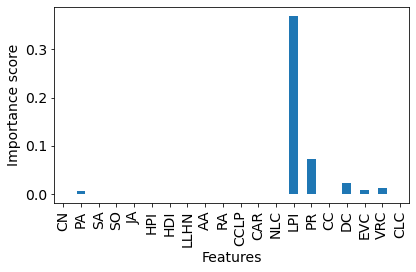

In [25]:
plt.rcParams.update({'font.size': 14})

gset=['bio-HS-HT','bio-CE-GT','bio-CE-HT','bio-CE-LC','bio-celegans-dir','bio-diseasome','bio-DM-HT','bio-DM-LC','bio-SC-LC','bio-yeast-protein-inter']
met=['SVM','DT','LOG']
feature_names = ['CN','PA','SA','SO','JA','HPI','HDI','LLHN','AA','RA','CCLP','CAR','NLC','LPI','PR','CC','DC','EVC','VRC','CLC']
ds=gset[6]
st='1'
clf=met[2]
compute_ranking(ds,st,clf,feature_names)